# SENSORLESS DRIVE DIAGNOSIS DATASET - UCI Repository

Data Set Information: 

Features are extracted from electric current drive signals. The drive has intact and defective components. This results in 11 different classes with different conditions. Each condition has been measured several times by 12 different operating conditions, this means by different speeds, load moments and load forces. The current signals are measured with a current probe and an oscilloscope on two phases.

In the dataset: • 49th attribute are the discrete class names from 1 to 11. 
                • Each class has 5319 instances.
                
                
Link to paper: https://www.researchgate.net/publication/261282496_Sensorless_drive_diagnosis_using_automated_feature_extraction_significance_ranking_and_reduction?enrichId=rgreq-e029472fd3e1745311a3df1a67e6a768-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI4MjQ5NjtBUzoxMTM3MDMzNTc3ODQwNjRAMTQwNDEyMDQwMTIwOA%3D%3D&el=1_x_2&_esc=publicationCoverPdf


Attribute Information: 

The Empirical Mode Decomposition (EMD) was used to generate a new database for the generation of features. The first three intrinsic mode functions (IMF) of the two phase currents and their residuals (RES) were used and broken down into sub-sequences. For each of this sub-sequences, the statistical features mean, standard deviation, skewness and kurtosis were calculated.

Problem type: 

This is a Classification problem with 48 input features and 58509 datapoints. The result/output will be the classification of 11 different categories with different conditions

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import urllib.request
import json

import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC


In [2]:
import os 
os.getcwd()

'/Users/User/Documents/Jupyter/EE259/PROJECT'

#### We import urllib.request to load the dataset dynamically from the repository, instead of having to save it in prior to running the notebook

In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt'
raw_data = urllib.request.urlopen(data_url)
dataset = np.loadtxt(raw_data, delimiter = ' ')

In [4]:
print(dataset.shape) # using which we can note that there are 58509 rows (datapoints) and 49 columns (attributes)

(58509, 49)


In [5]:
df = pd.DataFrame(dataset) # converting numpy array into an dataframe for easy analysis
df.to_csv('sensorless_drive.csv',  index = False)

### Data Visulaization

In [6]:
drive_df = pd.read_csv('sensorless_drive.csv')
drive_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1.0
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1.0
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1.0
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1.0
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1.0


The input features need to be scaled because they vary from one another by many orders of magnitude. 

In [7]:
drive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
0     58509 non-null float64
1     58509 non-null float64
2     58509 non-null float64
3     58509 non-null float64
4     58509 non-null float64
5     58509 non-null float64
6     58509 non-null float64
7     58509 non-null float64
8     58509 non-null float64
9     58509 non-null float64
10    58509 non-null float64
11    58509 non-null float64
12    58509 non-null float64
13    58509 non-null float64
14    58509 non-null float64
15    58509 non-null float64
16    58509 non-null float64
17    58509 non-null float64
18    58509 non-null float64
19    58509 non-null float64
20    58509 non-null float64
21    58509 non-null float64
22    58509 non-null float64
23    58509 non-null float64
24    58509 non-null float64
25    58509 non-null float64
26    58509 non-null float64
27    58509 non-null float64
28    58509 non-null float64
29    58509 non-null float64
30    58509 non-null 

No missing values or undefined objects. Data set does not require further cleaning.

In [8]:
drive_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686,6.000000
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175,3.162305
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


scatter_matrix(drive_df)

In [12]:
#Correlation Matrix of features and response
corr_matrix = drive_df.corr()
corr_matrix['48'].sort_values(ascending=False)

48    1.000000
44    0.081956
43    0.081503
42    0.080970
20    0.062139
19    0.062117
18    0.062109
23    0.061153
22    0.061140
21    0.061139
24    0.022642
16    0.021232
17    0.017817
27    0.015957
40    0.013720
15    0.012257
41    0.011424
38    0.010056
29    0.007787
3     0.005692
12    0.003906
36    0.001820
39   -0.003199
46   -0.004733
45   -0.004803
14   -0.005486
47   -0.005974
26   -0.006269
37   -0.007184
13   -0.007374
0    -0.017853
2    -0.030237
5    -0.035783
28   -0.046241
25   -0.048018
1    -0.098850
4    -0.110669
31   -0.117675
30   -0.118155
32   -0.118320
34   -0.153533
35   -0.153579
33   -0.153816
11   -0.340086
10   -0.340194
9    -0.340275
8    -0.407069
7    -0.407312
6    -0.407439
Name: 48, dtype: float64

In [11]:
for i in range(1,12):
    n = len(drive_df[drive_df['48']==i])
    print('Number of samples in class {0} = {1}'.format(i, n))

Number of samples in class 1 = 5319
Number of samples in class 2 = 5319
Number of samples in class 3 = 5319
Number of samples in class 4 = 5319
Number of samples in class 5 = 5319
Number of samples in class 6 = 5319
Number of samples in class 7 = 5319
Number of samples in class 8 = 5319
Number of samples in class 9 = 5319
Number of samples in class 10 = 5319
Number of samples in class 11 = 5319


There are equal number of samples in each class. Therefore, it can be concluded that this is a balanced data set. 

In [10]:
#Define feature set and output
X = drive_df.drop(["48"], axis =1)
# X = drive_df[['1', '2', '3', '4', '5', '6', '13', '14', '20', '24', '32', '33', '36', '37', '39', '43']]
y = drive_df["48"]

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separate into train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 42)

### Model I : Logistic Regression 

In [13]:
#Train Classifier
log_reg = skl_lm.LogisticRegression(solver='newton-cg', C=1)
log_reg.fit(X_train,y_train)

y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 75.47%


#### Model Tuning and Feature Optimization

In [14]:
#Train Classifier
log_reg = skl_lm.LogisticRegression(solver='newton-cg', C=700)
log_reg.fit(X_train,y_train)

y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 76.91%


Scikit-Learn Logistic Regression function has a built in regularization hyperparameter called the C hyperparameter. By default, C is L2 regularization. C hyperparameter signifies inverse of regularization. C value was increased to reduce redularization. C parameter was fine-tuned from 1 to 1000 which gave a slight improvement (~2%) in the model train accuracy.

In [16]:
# Feature set optimization : Recursive Feature Elimination and Cross Validation
# The "accuracy" scoring is proportional to the number of correct classifications
log_rfecv = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(2), scoring='accuracy')
log_rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=700, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

For the logistic regression classifier, feature selection is done using Recursive Feature Elimination or Backward Selection technique. For each feature eliminated, a two-fold cross validation is performed. Based on the CV scores the best set of features are chosen. 

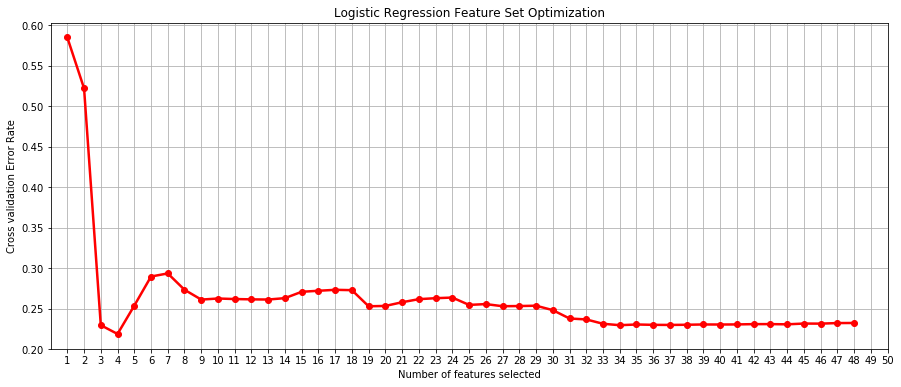

Optimal number of features : 4


In [170]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,6))
plt.xlim(0, 50)
plt.xticks(range(1,51))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Error Rate")
plt.title('Logistic Regression Feature Set Optimization')
plt.plot(range(1, len(log_rfecv.grid_scores_) + 1), 1-log_rfecv.grid_scores_,'r-o', linewidth=2.5)
plt.grid()
plt.show()

print("Optimal number of features : %d" % log_rfecv.n_features_)

CV Error rate is the least when there are only 4 input features. The classifier is fit on the optimized dataset to obtain the improved model.

In [37]:
#Analysis
log_rfecv.ranking_

array([25, 29, 42, 24, 27, 44,  1,  1, 11,  1,  1,  6, 17, 31, 40, 18, 28,
       36,  3, 10,  2,  4,  7,  5, 16, 39, 43, 21, 34, 41, 13, 12, 30,  8,
        9, 26, 15, 37, 45, 14, 32, 38, 22, 23, 35, 20, 19, 33])

#### Improved Classifier

In [26]:
y_train_pred = log_rfecv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 77.91%


In [27]:
#Generate train confustion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix : \n", conf_matrix_train)

Train Confusion Matrix : 
 [[2973    0    0    0    0  464    0    4  261    0    0]
 [   1 2622   13   44    0    1    0    0   60  932    0]
 [   0    0 3068  229  264   13    0    0    1  173    0]
 [   0    0  116 3021  264    0    2   88    0  251    0]
 [   7    0  229  306 2389   43    0  758    0    9    0]
 [ 978    0   96    0   21 1953    0    6  657    0    0]
 [   0    0    0    0    0    0 3689    0    0    0    0]
 [ 335    0   88   59  774   36    0 2465    6    1    0]
 [ 423   29   54   16    6  518    0    3 2742    1    0]
 [   0  373    0   33    0    0    0    0    0 3320    0]
 [   0    0    0    0    0    0    0    0    0    0 3668]]


#### Test Set Performance

In [29]:
#Applying the final model on the test set
y_test_pred = log_rfecv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Test Accuracy ={0:.2f}%'.format(test_accuracy*100))

Test Accuracy =77.83%


In [30]:
#Generate test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix : \n", conf_matrix_test)

Test Confusion Matrix : 
 [[1317    0    0    0    0  190    0    2  108    0    0]
 [   1 1171    9   17    0    0    0    0   24  424    0]
 [   0    3 1294  100  113    5    0    1    0   55    0]
 [   0    0   47 1255  117    0    0   43    0  115    0]
 [   5    0   92  138  972   14    0  351    0    6    0]
 [ 413    0   48    0   15  850    0    1  281    0    0]
 [   0    0    0    0    0    0 1630    0    0    0    0]
 [ 147    0   43   30  303    9    0 1020    3    0    0]
 [ 199   12   20    4    2  206    0    2 1080    2    0]
 [   0  158    0   13    0    0    0    0    1 1421    0]
 [   0    0    0    0    0    0    0    0    0    0 1651]]


In [31]:
#Generate test classification report
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7',
                'Class 8','Class 9','Class 10','Class 11' ]
print(classification_report(y_test, y_test_pred, target_names = target_names, digits=4))

             precision    recall  f1-score   support

    Class 1     0.6326    0.8145    0.7121      1617
    Class 2     0.8713    0.7114    0.7833      1646
    Class 3     0.8332    0.8237    0.8284      1571
    Class 4     0.8060    0.7958    0.8009      1577
    Class 5     0.6386    0.6160    0.6271      1578
    Class 6     0.6672    0.5286    0.5899      1608
    Class 7     1.0000    1.0000    1.0000      1630
    Class 8     0.7183    0.6559    0.6857      1555
    Class 9     0.7214    0.7073    0.7143      1527
   Class 10     0.7024    0.8920    0.7860      1593
   Class 11     1.0000    1.0000    1.0000      1651

avg / total     0.7826    0.7783    0.7767     17553



### Model II : LDA

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_train_pred = lda.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 85.42%


In [44]:
# Feature set optimization : Recursive Feature Elimination and Cross Validation
# The "accuracy" scoring is proportional to the number of correct classifications
lda_rfecv = RFECV(estimator=lda, step=1, cv=StratifiedKFold(2), scoring='accuracy')
lda_rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

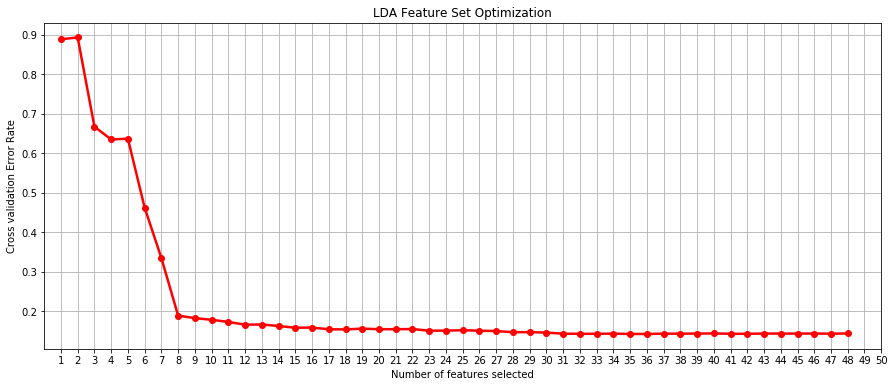

Optimal number of features : 36


In [172]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,6))
plt.xlim(0, 50)
plt.xticks(range(1,51))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Error Rate")
plt.title('LDA Feature Set Optimization')
plt.plot(range(1, len(lda_rfecv.grid_scores_) + 1), 1-lda_rfecv.grid_scores_,'r-o', linewidth=2.5)
plt.grid()
plt.show()

print("Optimal number of features : %d" % lda_rfecv.n_features_)

CV Error rate is the least when there are only 36 input features. The classifier is fit on the optimized dataset to obtain the improved model.

In [46]:
#Analysis
lda_rfecv.ranking_

array([ 1,  1,  8,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  7, 11,  1,  9, 12,  1,  1,  1,  1,
        1,  1,  1,  5, 10,  1,  6, 13,  1,  1,  2,  1,  1,  1])

#### Improved Classifier

In [47]:
y_train_pred = lda_rfecv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 85.45%


In [48]:
#Generate train confustion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix : \n", conf_matrix_train)

Train Confusion Matrix : 
 [[3244    0    0    0    0  375    0    0   83    0    0]
 [   1 2991    0    0    0    0    0    0    6  675    0]
 [   3    0 3440    0  275   29    0    0    1    0    0]
 [   0    0  278 3375   60    0    1   28    0    0    0]
 [   2    0  156  208 2680    2    0  693    0    0    0]
 [ 614    0   34    0    0 2566    0    0  497    0    0]
 [   0    0    0    1    0    0 3688    0    0    0    0]
 [   3    0   50  119  476    2    1 3110    3    0    0]
 [  58   11    2    0    0  720    0    0 2981   20    0]
 [   0  474    0    0    0    0    0    0    0 3252    0]
 [   0    0    0    0    0    0    0    0    0    0 3668]]


#### Test Set Performance

In [49]:
#Applying the final model on the test set
y_test_pred = lda_rfecv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Test Accuracy ={0:.2f}%'.format(test_accuracy*100))

Test Accuracy =85.28%


In [50]:
#Generate test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix : \n", conf_matrix_test)

Test Confusion Matrix : 
 [[1412    0    0    0    0  164    0    0   41    0    0]
 [   0 1350    0    0    0    0    0    1    5  289    1]
 [   0    0 1437    0  123    9    0    1    1    0    0]
 [   0    0  126 1402   33    0    1   15    0    0    0]
 [   2    0   67   87 1108    0    0  313    1    0    0]
 [ 278    0   16    0    0 1105    0    0  209    0    0]
 [   0    0    0    0    0    0 1629    0    0    0    1]
 [   3    0   14   53  204    5    0 1275    1    0    0]
 [  22    5    0    0    0  279    0    1 1208   12    0]
 [   0  201    0    0    0    0    0    0    0 1392    0]
 [   0    0    0    0    0    0    0    0    0    0 1651]]


In [51]:
#Generate test classification report
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7',
                'Class 8','Class 9','Class 10','Class 11' ]
print(classification_report(y_test, y_test_pred, target_names = target_names, digits=4))

             precision    recall  f1-score   support

    Class 1     0.8224    0.8732    0.8470      1617
    Class 2     0.8676    0.8202    0.8432      1646
    Class 3     0.8657    0.9147    0.8895      1571
    Class 4     0.9092    0.8890    0.8990      1577
    Class 5     0.7548    0.7022    0.7275      1578
    Class 6     0.7074    0.6872    0.6972      1608
    Class 7     0.9994    0.9994    0.9994      1630
    Class 8     0.7939    0.8199    0.8067      1555
    Class 9     0.8240    0.7911    0.8072      1527
   Class 10     0.8222    0.8738    0.8472      1593
   Class 11     0.9988    1.0000    0.9994      1651

avg / total     0.8523    0.8528    0.8521     17553



### Model III : Linear Support Vector Classifier

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
svc = SVC(kernel ='linear')
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 93.05%


In [72]:
# Feature set optimization : Recursive Feature Elimination and Cross Validation
# The "accuracy" scoring is proportional to the number of correct classifications
svc_rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
svc_rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

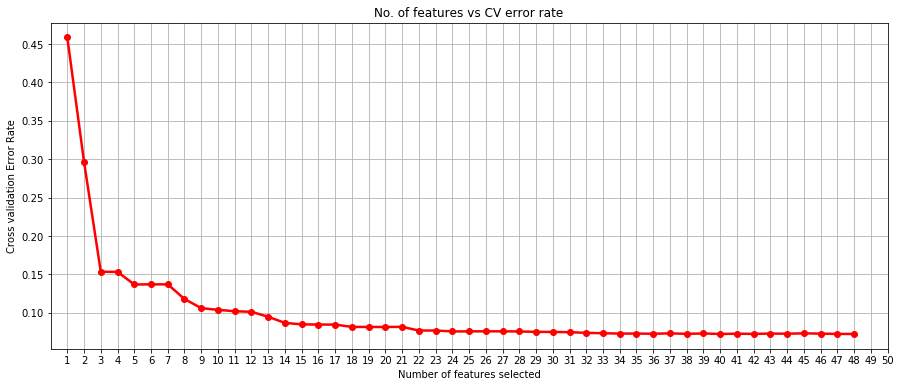

Optimal number of features : 40


In [173]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,6))
plt.xlim(0, 50)
plt.xticks(range(1,51))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Error Rate")
plt.title('No. of features vs CV error rate')
plt.plot(range(1, len(svc_rfecv.grid_scores_) + 1), 1-svc_rfecv.grid_scores_,'r-o', linewidth=2.5)
plt.grid()
plt.show()

print("Optimal number of features : %d" % svc_rfecv.n_features_)

CV Error rate is the least when there are only 40 input features. The classifier is fit on the optimized dataset to obtain the improved model.

In [74]:
#Analysis
svc_rfecv.ranking_

array([1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 7, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 6, 8, 1, 1, 9, 1, 1, 1, 1,
       1, 1])

#### Improved Classifier

In [75]:
y_train_pred = svc_rfecv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 93.05%


In [76]:
#Generate train confustion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix : \n", conf_matrix_train)

Train Confusion Matrix : 
 [[3577    0    0    0    0  122    0    0    3    0    0]
 [   0 3350    0    0    0    0    0    0    3  320    0]
 [   0    0 3658   14   76    0    0    0    0    0    0]
 [   0    0   37 3684   21    0    0    0    0    0    0]
 [   0    0   79   49 3065    0    0  548    0    0    0]
 [ 145    0    8    0    0 3212    0    0  346    0    0]
 [   0    0    0    0    0    0 3689    0    0    0    0]
 [   0    0    1   15  251    0    0 3497    0    0    0]
 [  45   14    1    0    0  338    0    0 3388    6    0]
 [   0  404    0    0    0    0    0    0    0 3322    0]
 [   0    0    0    0    0    0    0    0    0    0 3668]]


#### Test Set Performance

In [77]:
#Applying the final model on the test set
y_test_pred = svc_rfecv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Test Accuracy ={0:.2f}%'.format(test_accuracy*100))

Test Accuracy =92.68%


In [78]:
#Generate test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix : \n", conf_matrix_test)

Test Confusion Matrix : 
 [[1562    0    0    0    0   53    0    0    2    0    0]
 [   1 1494    0    0    0    0    0    1    3  146    1]
 [   0    0 1527    4   40    0    0    0    0    0    0]
 [   0    0    6 1558   13    0    0    0    0    0    0]
 [   0    0   31   29 1261    0    0  257    0    0    0]
 [  67    0   13    0    0 1386    0    0  142    0    0]
 [   0    0    0    0    1    0 1629    0    0    0    0]
 [   1    0    1   11  117    0    0 1425    0    0    0]
 [  27    3    1    0    0  135    0    0 1355    6    0]
 [   0  173    0    0    0    0    0    0    0 1420    0]
 [   0    0    0    0    0    0    0    0    0    0 1651]]


In [79]:
#Generate test classification report
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7',
                'Class 8','Class 9','Class 10','Class 11' ]
print(classification_report(y_test, y_test_pred, target_names = target_names, digits=4))

             precision    recall  f1-score   support

    Class 1     0.9421    0.9660    0.9539      1617
    Class 2     0.8946    0.9077    0.9011      1646
    Class 3     0.9671    0.9720    0.9695      1571
    Class 4     0.9725    0.9880    0.9802      1577
    Class 5     0.8806    0.7991    0.8379      1578
    Class 6     0.8806    0.8619    0.8712      1608
    Class 7     1.0000    0.9994    0.9997      1630
    Class 8     0.8467    0.9164    0.8802      1555
    Class 9     0.9021    0.8874    0.8947      1527
   Class 10     0.9033    0.8914    0.8973      1593
   Class 11     0.9994    1.0000    0.9997      1651

avg / total     0.9268    0.9268    0.9264     17553



### Model IV : kNN

In [155]:
# Creating odd list of K for KNN
myList = list(range(1,50))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

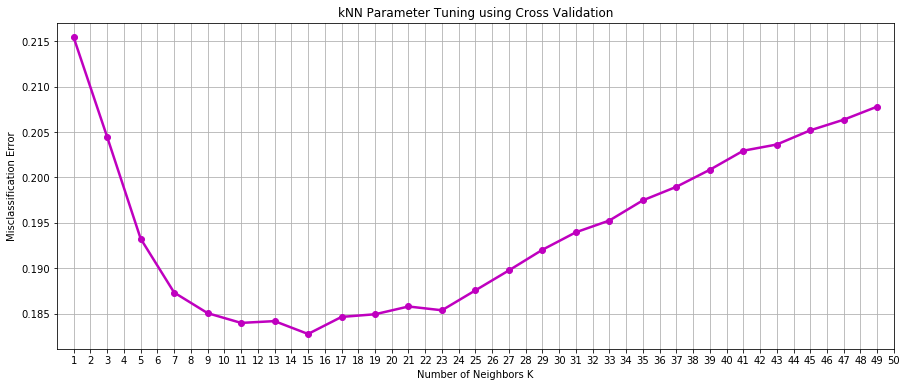

The optimal number of neighbors is 15


In [158]:
# Changing to misclassification error
knn_MSE = [1 - x for x in cv_scores]

# Plot misclassification error vs k
plt.figure(figsize=(15,6))
plt.plot(neighbors, knn_MSE, 'm-o', linewidth =2.5)
plt.xlim(0, 50)
plt.xticks(range(1,51))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('kNN Parameter Tuning using Cross Validation')
plt.grid()
plt.show()

# # Determining best k
optimal_k = neighbors[knn_MSE.index(min(knn_MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

#### Improved Classifier

In [159]:
# Using optimal 'k' for training
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k)
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 100.00%


In [160]:
#Generate train confustion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix : \n", conf_matrix_train)

Train Confusion Matrix : 
 [[3702    0    0    0    0    0    0    0    0    0    0]
 [   0 3673    0    0    0    0    0    0    0    0    0]
 [   0    0 3748    0    0    0    0    0    0    0    0]
 [   0    0    0 3742    0    0    0    0    0    0    0]
 [   0    0    0    0 3741    0    0    0    0    0    0]
 [   0    0    0    0    0 3711    0    0    0    0    0]
 [   0    0    0    0    0    0 3689    0    0    0    0]
 [   0    0    0    0    0    0    0 3764    0    0    0]
 [   0    0    0    0    0    0    0    0 3792    0    0]
 [   0    0    0    0    0    0    0    0    0 3726    0]
 [   0    0    0    0    0    0    0    0    0    0 3668]]


#### Test Set Performance

In [161]:
#Applying the final model on the test set
y_test_pred = knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Test Accuracy ={0:.2f}%'.format(test_accuracy*100))

Test Accuracy =82.53%


In [162]:
#Generate test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix : \n", conf_matrix_test)

Test Confusion Matrix : 
 [[1255    2   24    1   10  259    0    9   56    1    0]
 [   5 1331    6    2    3   12    1    0   20  266    0]
 [  37    6 1363   18   77   44    0   10   11    5    0]
 [   0    2   54 1379   91    4    6   40    1    0    0]
 [  20    0  147  134 1097   23    0  148    9    0    0]
 [ 229    7   48    3   36 1202    0   21   58    4    0]
 [   0    0    1   21    2    0 1601    4    1    0    0]
 [  23    0   17   97  206   55    0 1123   34    0    0]
 [  43   17   31    6   14  138    1   22 1251    3    1]
 [   1  334    5    0    3   10    0    0    6 1234    0]
 [   0    0    0    0    0    0    0    0    0    0 1651]]


In [163]:
#Generate test classification report
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7',
                'Class 8','Class 9','Class 10','Class 11' ]
print(classification_report(y_test, y_test_pred, target_names = target_names, digits=4))

             precision    recall  f1-score   support

    Class 1     0.7781    0.7761    0.7771      1617
    Class 2     0.7834    0.8086    0.7958      1646
    Class 3     0.8037    0.8676    0.8344      1571
    Class 4     0.8302    0.8744    0.8518      1577
    Class 5     0.7128    0.6952    0.7039      1578
    Class 6     0.6880    0.7475    0.7165      1608
    Class 7     0.9950    0.9822    0.9886      1630
    Class 8     0.8155    0.7222    0.7660      1555
    Class 9     0.8645    0.8193    0.8413      1527
   Class 10     0.8156    0.7746    0.7946      1593
   Class 11     0.9994    1.0000    0.9997      1651

avg / total     0.8266    0.8253    0.8253     17553



### Model V : Random Forest

In [11]:
# Creating even list of 't' for RandomForest
myList = list(range(1,50))

# Subsetting just the even ones
trees = list(filter(lambda x: x % 2 == 0, myList))

# Empty list that will hold cv scores
rf_cv_scores = []

# Perform 5-fold cross validation
for t in trees:
    rf = RandomForestClassifier(n_estimators=t)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    rf_cv_scores.append(scores.mean())

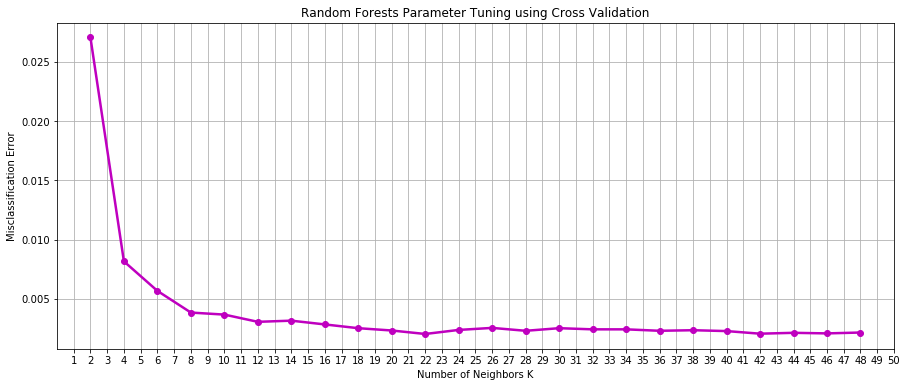

The optimal number of estimators is 22


In [13]:
# Changing to misclassification error
rf_MSE = [1 - x for x in rf_cv_scores]

# Plot misclassification error vs t
plt.figure(figsize=(15,6))
plt.plot(trees, rf_MSE, 'm-o', linewidth =2.5)
plt.xlim(0, 50)
plt.xticks(range(1,51))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Random Forests Parameter Tuning using Cross Validation')
plt.grid()
plt.show()

# # Determining best t
optimal_k = trees[rf_MSE.index(min(rf_MSE))]
print ("The optimal number of estimators is %d" % optimal_k)

In [14]:
rf_clf = RandomForestClassifier(n_estimators=22)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('Train Accuracy = {0:.2f}%'.format(train_accuracy*100))

Train Accuracy = 100.00%


In [15]:
#Generate train confustion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix : \n", conf_matrix_train)

Train Confusion Matrix : 
 [[3702    0    0    0    0    0    0    0    0    0    0]
 [   0 3673    0    0    0    0    0    0    0    0    0]
 [   0    0 3748    0    0    0    0    0    0    0    0]
 [   0    0    0 3742    0    0    0    0    0    0    0]
 [   0    0    0    0 3741    0    0    0    0    0    0]
 [   0    0    0    0    0 3711    0    0    0    0    0]
 [   0    0    0    0    0    0 3689    0    0    0    0]
 [   0    0    0    0    0    0    0 3764    0    0    0]
 [   0    0    0    0    0    0    0    0 3792    0    0]
 [   0    0    0    0    0    0    0    0    0 3726    0]
 [   0    0    0    0    0    0    0    0    0    0 3668]]


In [16]:
#Applying the final model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test Accuracy ={0:.2f}%'.format(test_accuracy*100))

Test Accuracy =99.81%


In [17]:
#Generate test confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix : \n", conf_matrix_test)

Test Confusion Matrix : 
 [[1615    0    0    0    0    2    0    0    0    0    0]
 [   0 1640    0    0    0    0    0    0    1    4    1]
 [   0    0 1571    0    0    0    0    0    0    0    0]
 [   0    0    0 1577    0    0    0    0    0    0    0]
 [   0    0    4    2 1570    0    0    2    0    0    0]
 [   1    0    0    0    0 1606    0    0    1    0    0]
 [   0    0    0    0    1    0 1629    0    0    0    0]
 [   0    0    0    2    4    0    0 1549    0    0    0]
 [   1    1    0    0    0    0    0    1 1522    2    0]
 [   0    3    0    0    0    0    0    0    0 1590    0]
 [   0    0    0    0    0    0    0    0    0    0 1651]]


In [18]:
#Generate test classification report
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6', 'Class 7',
                'Class 8','Class 9','Class 10','Class 11' ]
print(classification_report(y_test, y_test_pred, target_names = target_names, digits=4))

             precision    recall  f1-score   support

    Class 1     0.9988    0.9988    0.9988      1617
    Class 2     0.9976    0.9964    0.9970      1646
    Class 3     0.9975    1.0000    0.9987      1571
    Class 4     0.9975    1.0000    0.9987      1577
    Class 5     0.9968    0.9949    0.9959      1578
    Class 6     0.9988    0.9988    0.9988      1608
    Class 7     1.0000    0.9994    0.9997      1630
    Class 8     0.9981    0.9961    0.9971      1555
    Class 9     0.9987    0.9967    0.9977      1527
   Class 10     0.9962    0.9981    0.9972      1593
   Class 11     0.9994    1.0000    0.9997      1651

avg / total     0.9981    0.9981    0.9981     17553



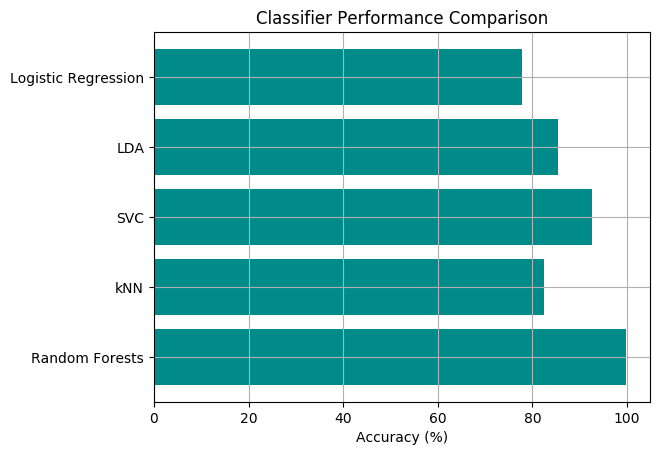

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
classifiers = ('Logistic Regression', 'LDA', 'SVC', 'kNN', 'Random Forests')
accuracy_list = (0.7783, 0.8538, 0.9268, 0.8253, 0.9981)
accuracy_array = np.asarray(accuracy_list)*100 

y_pos = np.arange(len(classifiers))
ax.barh(y_pos, accuracy_array, align='center',color='darkcyan', ecolor='black')
ax.grid()
ax.set_yticks(y_pos)
ax.set_yticklabels(classifiers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy (%)')
ax.set_title('Classifier Performance Comparison')

plt.show()

###### ~FIN~